In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random


In [2]:
feature_range = np.array([[-100, 100], [-100, 100]])

In [3]:
feature_range

array([[-100,  100],
       [-100,  100]])

In [18]:
def populate(feature_range, count=1000):
    population = []
    
    for i in range(count):
        item = []
        for feature in feature_range:
            f_val = np.random.uniform(feature[0],feature[1])
            item.append(f_val)
        population.append(item)
        
    return np.array(population)
            

In [20]:
population = populate(feature_range, 100)

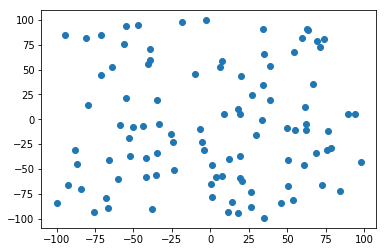

In [21]:
plt.scatter(population[:, 0], population[:, 1])

In [25]:
viruses = [(np.array([0.0, 0.0]), 1)]

In [26]:
viruses

[(array([0., 0.]), 1)]

In [142]:
def fitness(population, viruses):
    
    fit = None;
    for virus in viruses:
        v = np.sqrt(np.sum((population - virus[0]) ** 2, axis=1)) * virus[1]
        
        if fit is None:
            fit = v
        else:
            fit = fit + v
            
    return fit

In [143]:
fitness(population, viruses)

array([224.86797253,  92.1465228 , 145.66972335, 246.08417341,
       146.61125411, 250.31345577, 167.32372428, 132.01348925,
        77.59420324, 231.25760071, 154.44888345, 202.841328  ,
       281.10367908, 267.50701525, 172.71424771, 306.20591676,
       242.7956018 , 251.75447109, 152.55090032, 119.84043662,
        79.35078939, 112.42725893, 122.0767156 , 296.72494076,
       141.47063605,  90.10262803, 257.40991604,  77.55832816,
        94.31455183,  89.79400461, 286.63598334,  70.97667473,
       196.59004479, 184.68309686, 249.19769524,  70.78084146,
       208.01178369, 201.31456174, 213.83673828, 235.77936497,
       184.82415176, 173.95623548, 137.13801465,  92.55725572,
       110.21640638,  71.5146102 , 252.21642876,  78.64742459,
       164.19978656,  83.0855306 , 197.9706018 , 175.88774007,
       148.64739069, 191.44959113, 319.52008314, 334.62815548,
       120.64102496, 144.2324131 ,  81.62391567, 220.24230227,
       164.80761544, 244.09408386, 153.70553865, 148.74

In [144]:
def select(population, viruses, factor=2):
    total = fitness(population, viruses)
    fit = population[np.argsort(total)[:len(population)//factor]]
    return fit

In [145]:
new_pop = select(population, viruses, 2)

In [146]:
new_pop

array([[ 18.47829895,  17.19892961],
       [ 10.57977704,  12.45677012],
       [ 17.89388691,  21.42964283],
       [ 16.62333882,  12.66907845],
       [ 30.09466921,  22.54390182],
       [ 14.87369859,  -1.78880315],
       [ 52.31283826,  36.23567679],
       [ 29.47766113,   6.12698174],
       [ 44.65513478,  55.3280993 ],
       [ 27.17431672,   3.30384197],
       [ 52.5347839 ,  28.10015833],
       [ -1.54788237,  -6.4545208 ],
       [ 34.42839237,  -1.24422608],
       [  4.04262423,  43.13817883],
       [ 34.64061546,  61.72394247],
       [ 58.60794262,  21.58516827],
       [ 28.12580967,  -9.08214994],
       [-13.33334617,  -0.45386257],
       [ 14.15511476,  57.13263622],
       [-15.34118791, -10.66478362],
       [-10.48780242,  48.59335172],
       [ -9.82292991,  50.44957864],
       [ 75.33687381,  36.36176435],
       [-15.34341243,  52.25206387],
       [ 77.09782665,  18.8784482 ],
       [ 44.32988427,  79.88505445],
       [ 52.71539979, -16.7184867 ],
 

In [147]:
# population

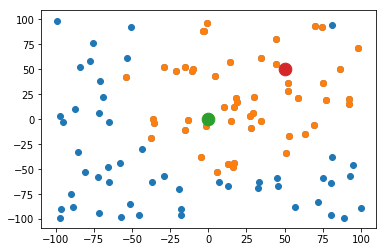

In [148]:
plt.scatter(population[:, 0], population[:, 1])
plt.scatter(new_pop[:, 0], new_pop[:, 1])
for virus in viruses:
    plt.scatter(virus[0][0], virus[0][1], s=160)

In [149]:
virus[0][1]

50.0

In [150]:
new_pop

array([[ 18.47829895,  17.19892961],
       [ 10.57977704,  12.45677012],
       [ 17.89388691,  21.42964283],
       [ 16.62333882,  12.66907845],
       [ 30.09466921,  22.54390182],
       [ 14.87369859,  -1.78880315],
       [ 52.31283826,  36.23567679],
       [ 29.47766113,   6.12698174],
       [ 44.65513478,  55.3280993 ],
       [ 27.17431672,   3.30384197],
       [ 52.5347839 ,  28.10015833],
       [ -1.54788237,  -6.4545208 ],
       [ 34.42839237,  -1.24422608],
       [  4.04262423,  43.13817883],
       [ 34.64061546,  61.72394247],
       [ 58.60794262,  21.58516827],
       [ 28.12580967,  -9.08214994],
       [-13.33334617,  -0.45386257],
       [ 14.15511476,  57.13263622],
       [-15.34118791, -10.66478362],
       [-10.48780242,  48.59335172],
       [ -9.82292991,  50.44957864],
       [ 75.33687381,  36.36176435],
       [-15.34341243,  52.25206387],
       [ 77.09782665,  18.8784482 ],
       [ 44.32988427,  79.88505445],
       [ 52.71539979, -16.7184867 ],
 

In [151]:
def mutate(item):
    return item + np.random.uniform(-4, 4, len(item))


def regen(seed, target=100):
    population = []
    for i in range(target):
        parents = random.choices(seed, k=2)
        item = np.array([parents[0][0], parents[1][1]])
        item = mutate(item)
        population.append(item)
    return np.array(population)
        

In [152]:
gen = regen(new_pop)

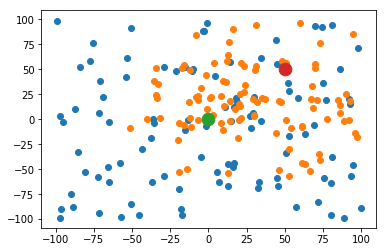

In [153]:
plt.scatter(population[:, 0], population[:, 1])
plt.scatter(gen[:, 0], gen[:, 1])
for virus in viruses:
    plt.scatter(virus[0][0], virus[0][1], s=160)

In [154]:
np.random.uniform(3, 8, 4)

array([4.30608591, 4.6127767 , 7.1844979 , 3.22497419])

/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


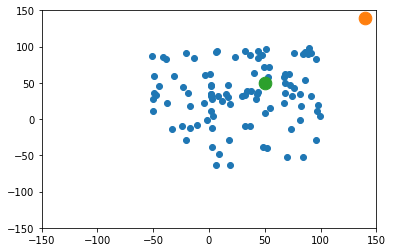

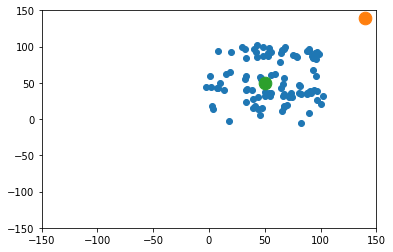

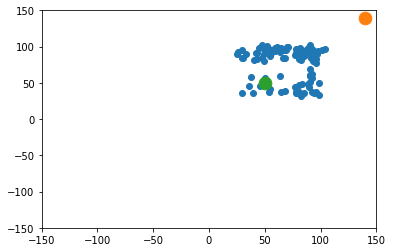

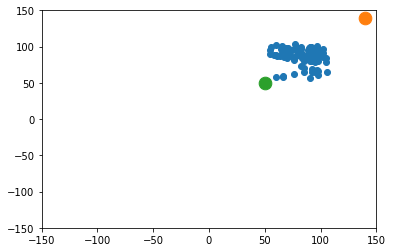

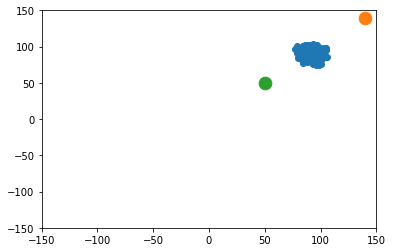

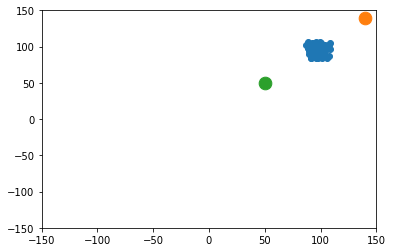

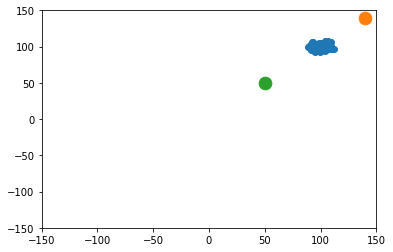

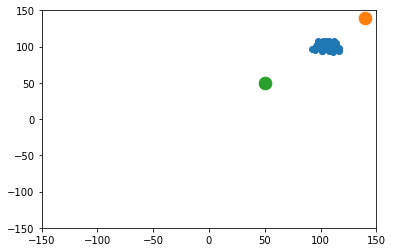

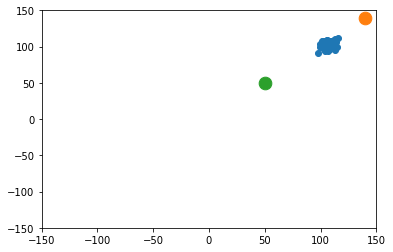

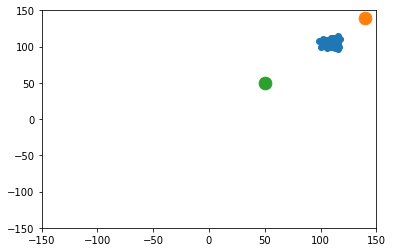

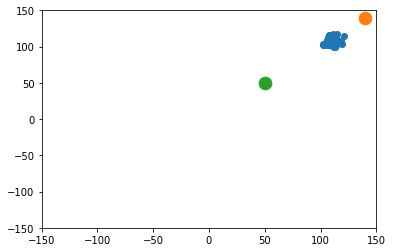

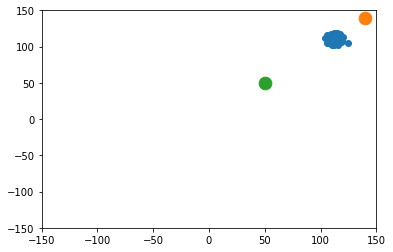

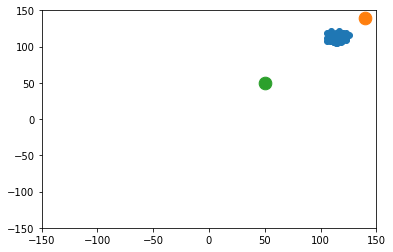

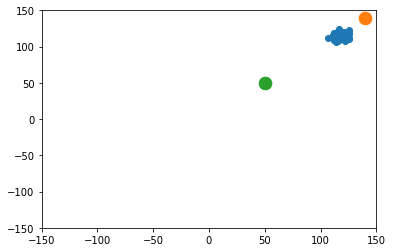

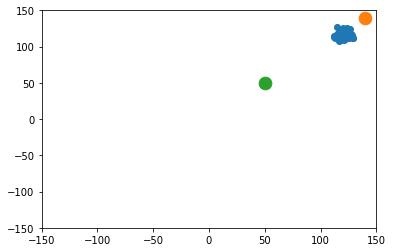

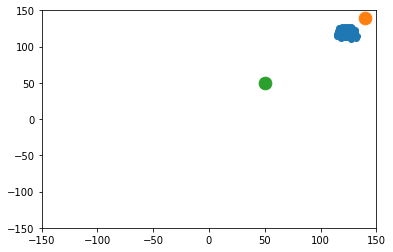

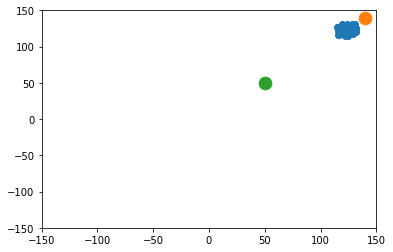

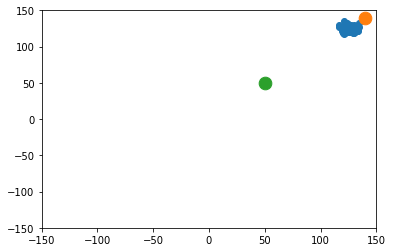

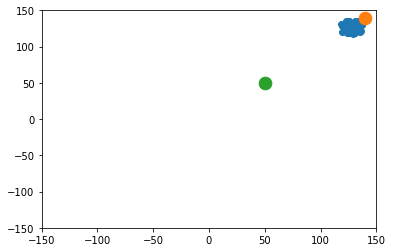

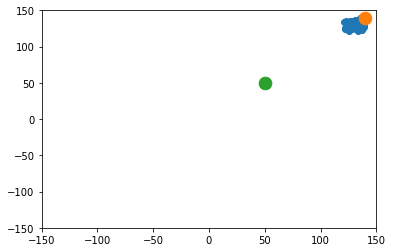

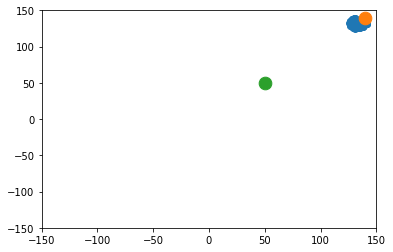

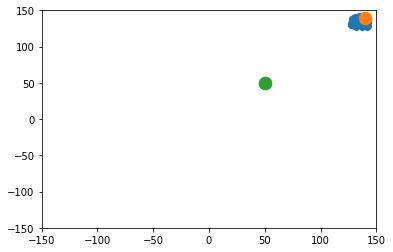

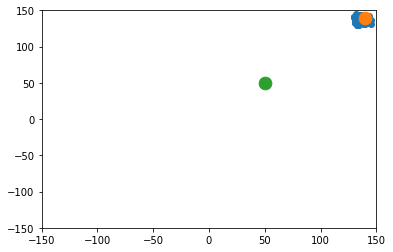

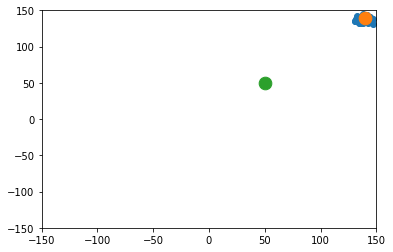

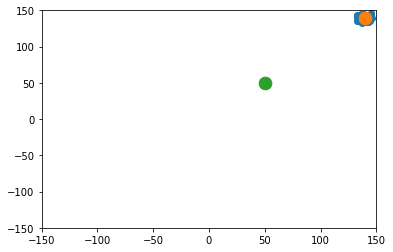

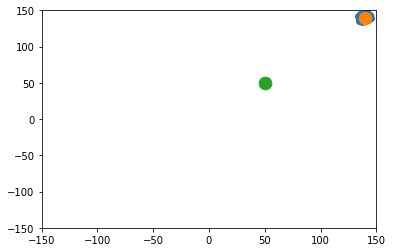

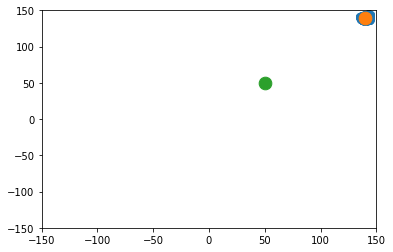

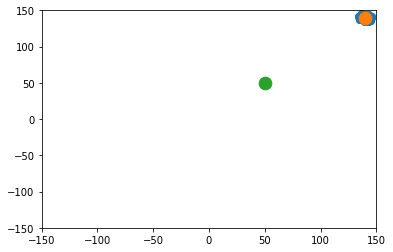

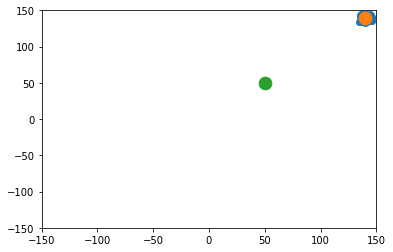

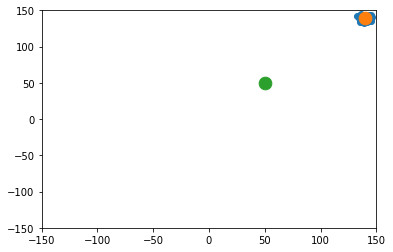

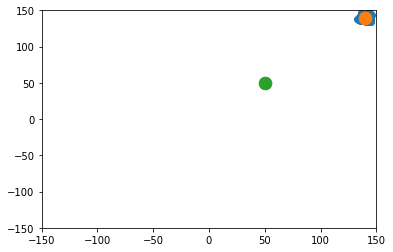

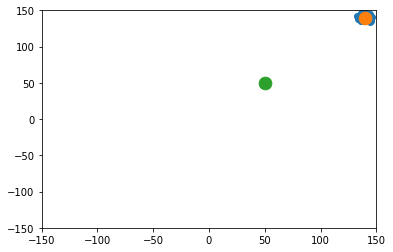

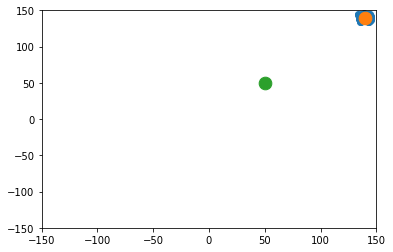

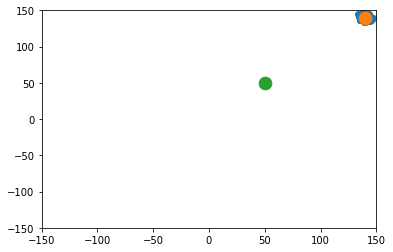

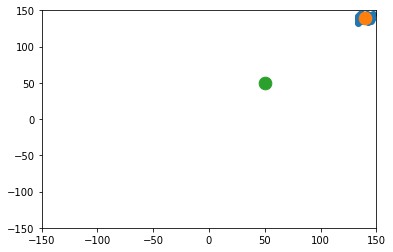

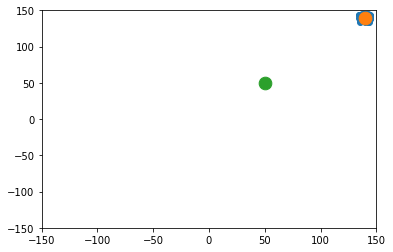

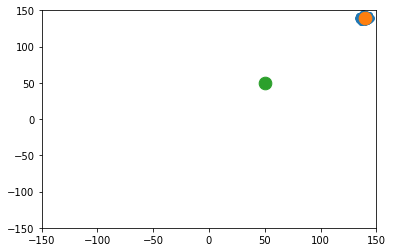

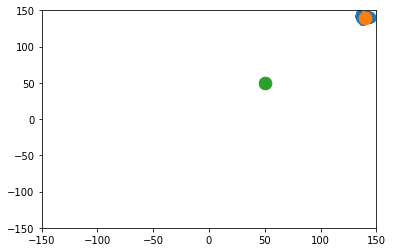

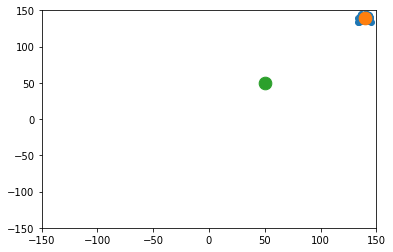

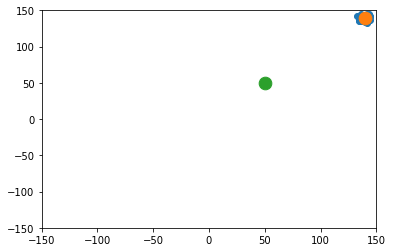

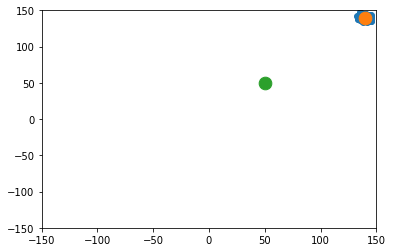

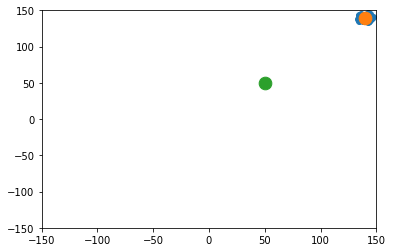

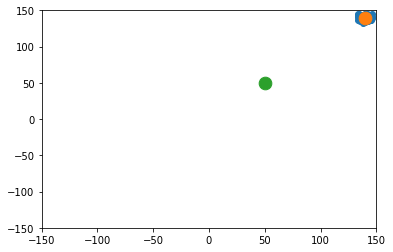

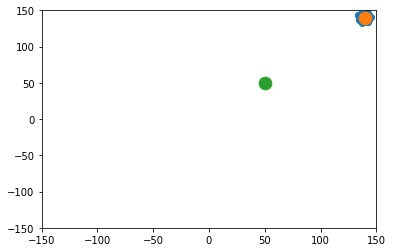

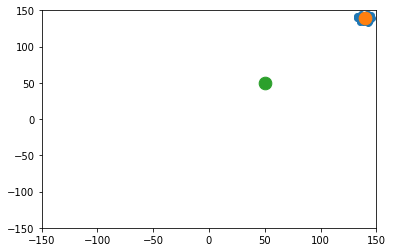

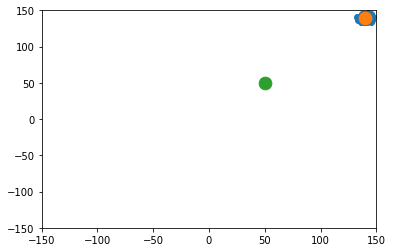

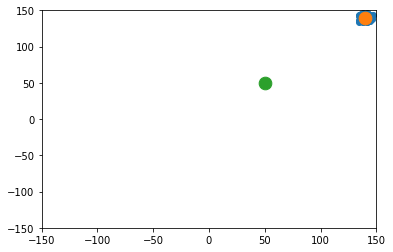

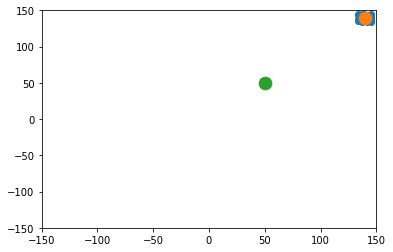

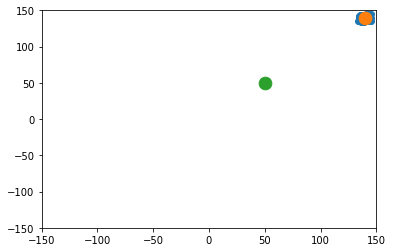

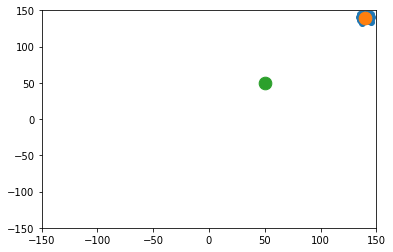

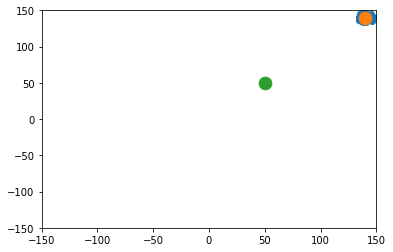

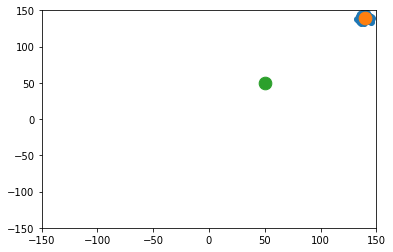

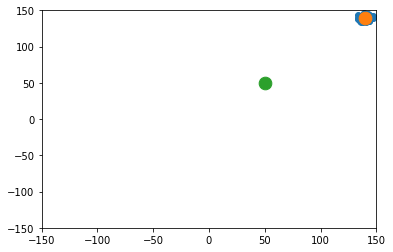

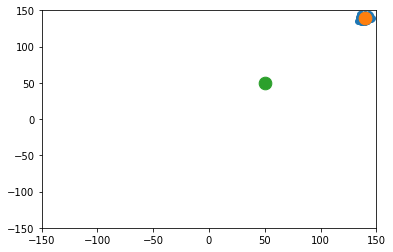

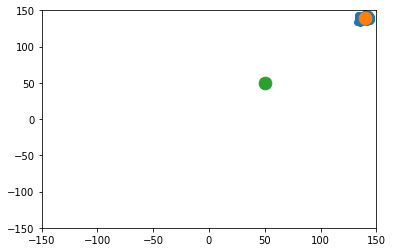

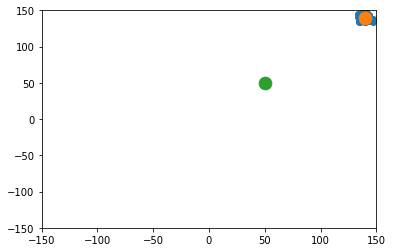

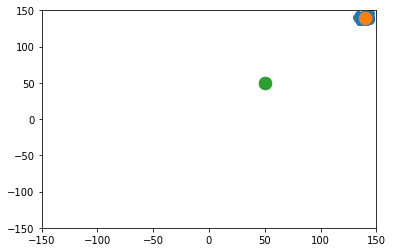

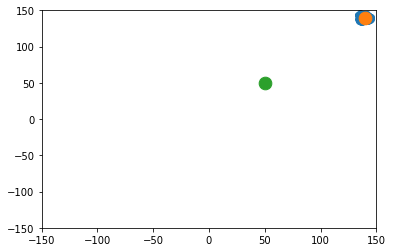

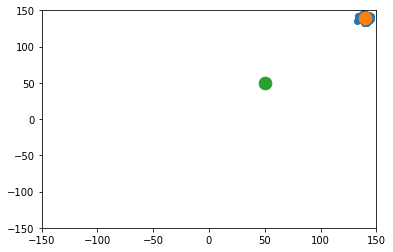

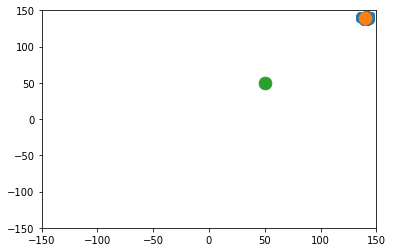

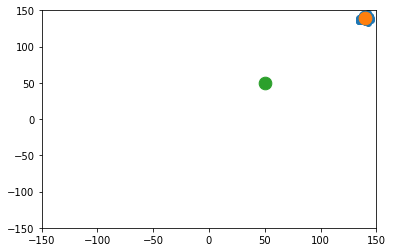

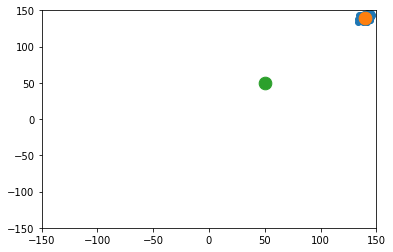

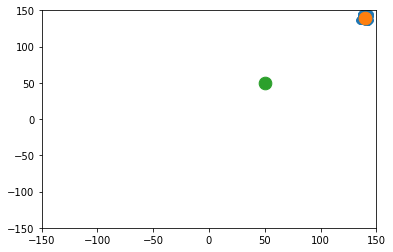

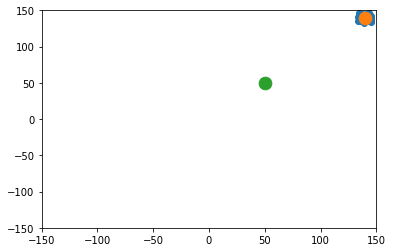

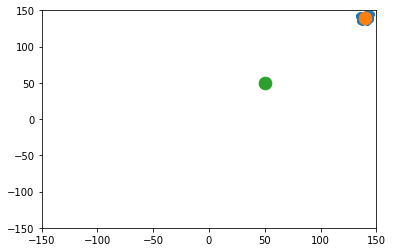

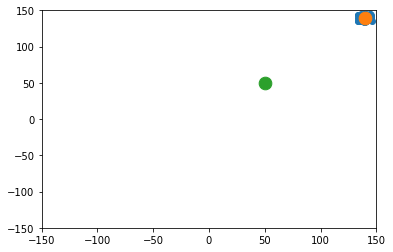

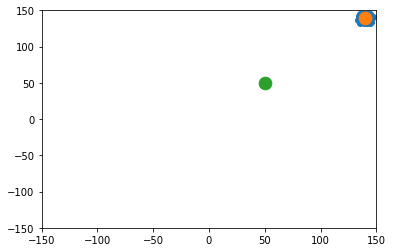

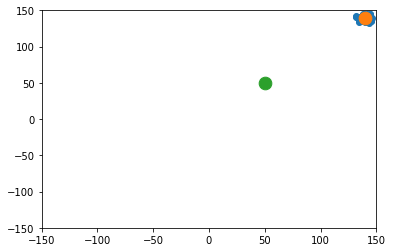

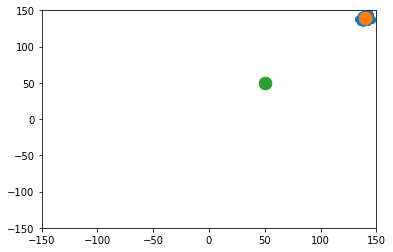

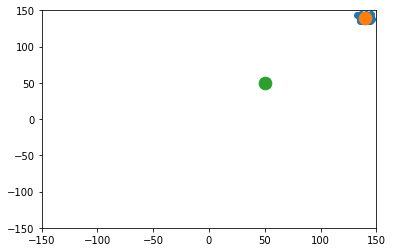

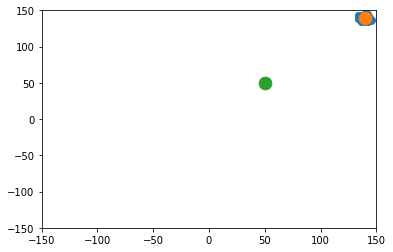

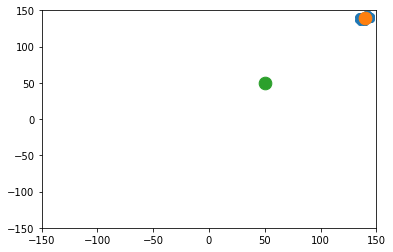

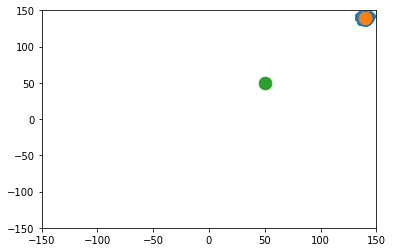

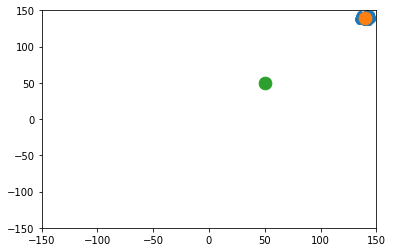

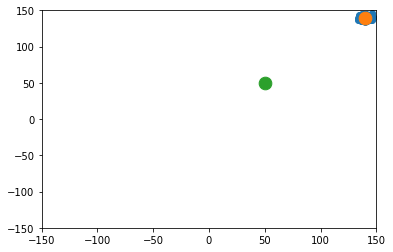

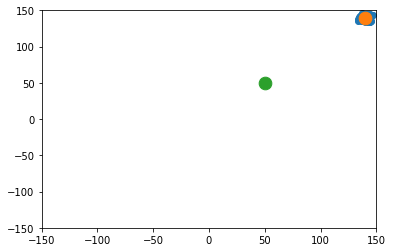

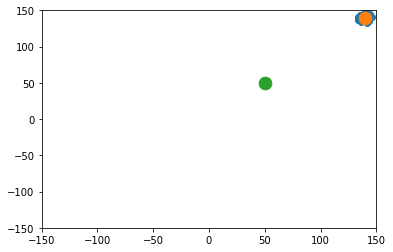

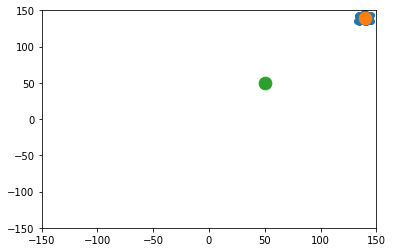

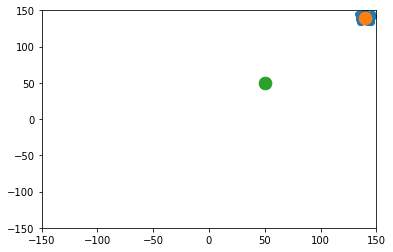

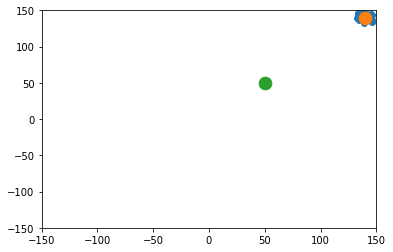

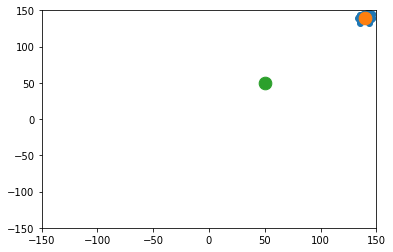

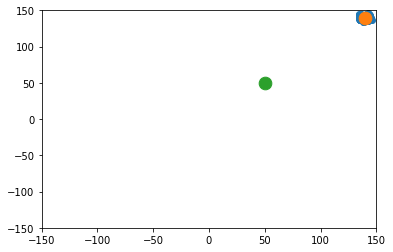

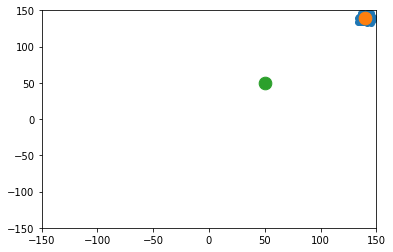

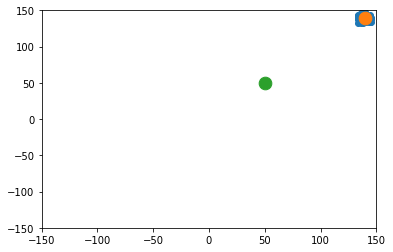

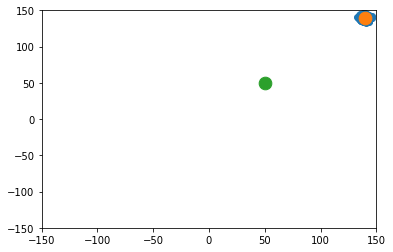

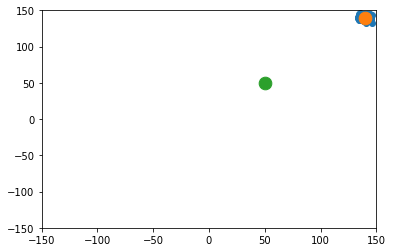

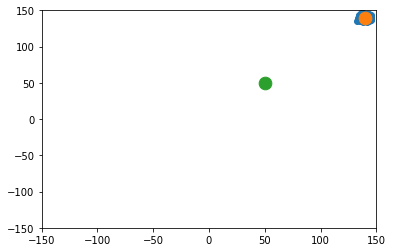

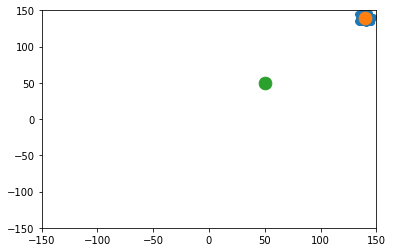

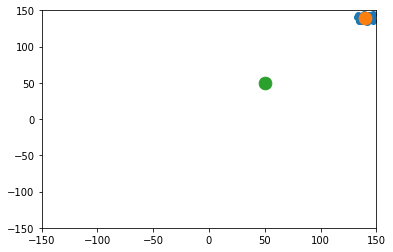

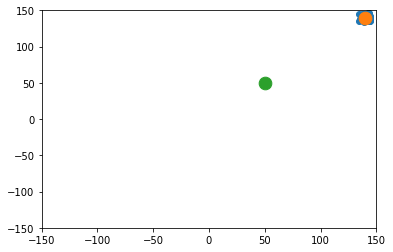

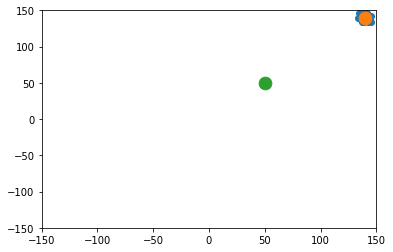

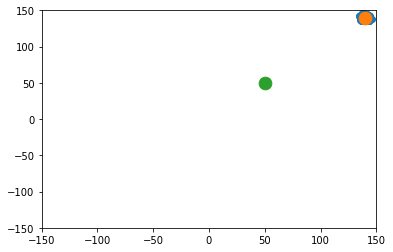

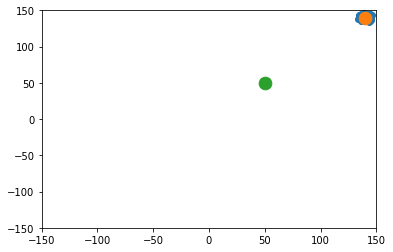

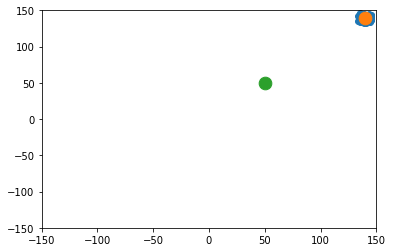

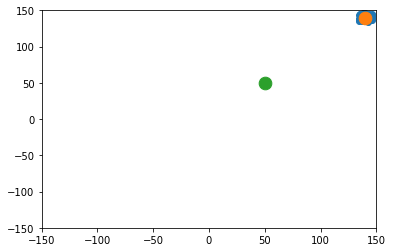

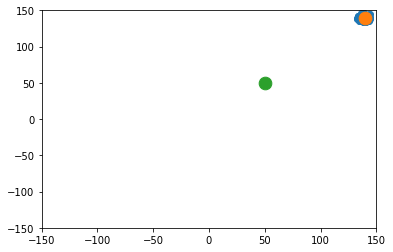

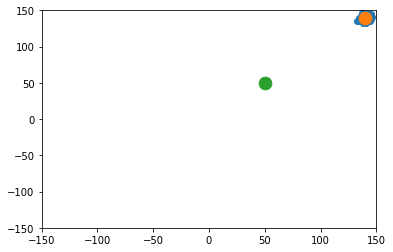

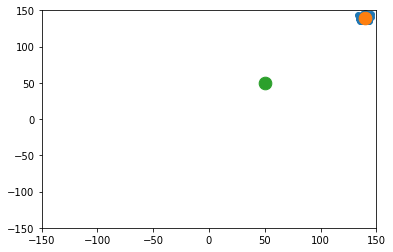

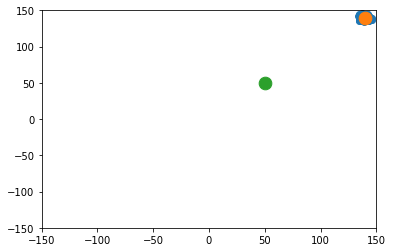

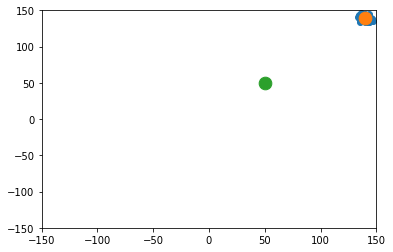

In [159]:
feature_range = np.array([[-100, 100], [-100, 100]])
viruses = [(np.array([140.0, 140.0]), 10), (np.array([50.0, 50.0]), 1)]
population = populate(feature_range, 100)

for _ in range(100):
    fit = select(population, viruses, factor=2)
    population = regen(fit, len(population))
    plt.figure()
    plt.xlim(-150, 150)
    plt.ylim(-150, 150)
    plt.scatter(population[:, 0], population[:, 1])
    for virus in viruses:
        plt.scatter(virus[0][0], virus[0][1], s=160)
    
